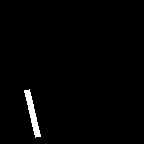

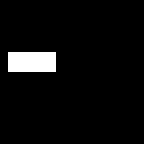

TypeError: circle() missing 5 required positional arguments: 'center_x', 'center_y', 'radius', 'angle', and 'fill'

In [28]:
import importlib
import project
importlib.reload(project)
import util as u
importlib.reload(u)
import data as d
importlib.reload(d)

from PIL import Image
import tensorflow as tf
import numpy as np

project.display_classes()

In [ ]:
Image.fromarray((d.rainbow((200, 200), 0, 0, 0) * 255).astype(np.uint8), mode="RGB")

In [ ]:
for i, clss in enumerate(d.classes()):
    print(i, clss)

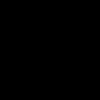

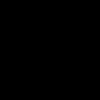

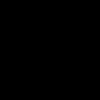

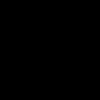

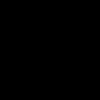

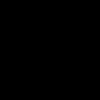

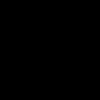

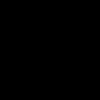

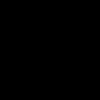

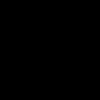

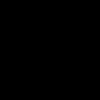

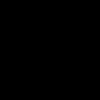

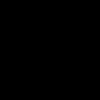

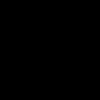

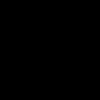

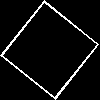

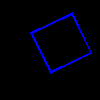

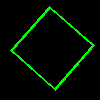

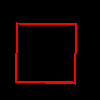

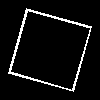

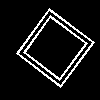

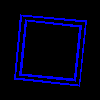

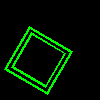

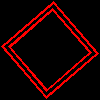

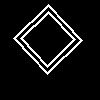

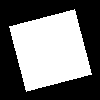

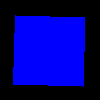

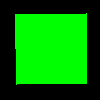

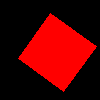

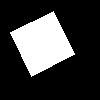

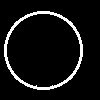

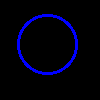

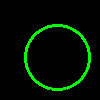

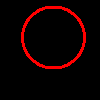

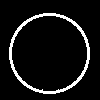

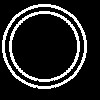

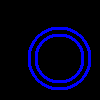

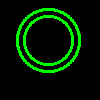

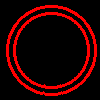

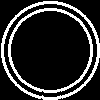

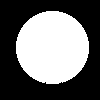

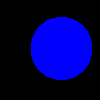

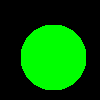

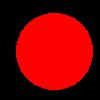

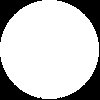

tri


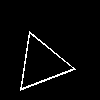

tri


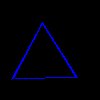

tri


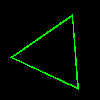

tri


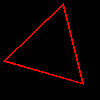

tri


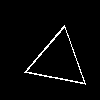

tri


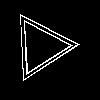

tri


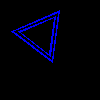

tri


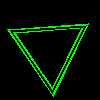

tri


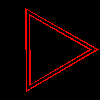

tri


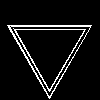

tri


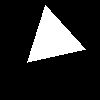

tri


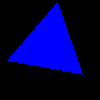

tri


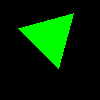

tri


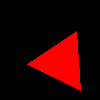

tri


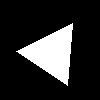

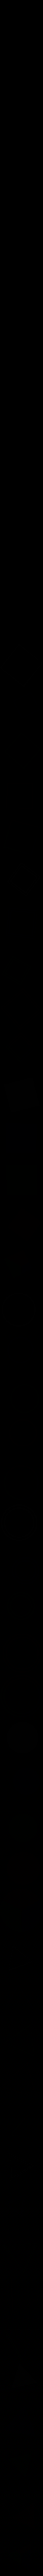

In [29]:
shapes = d.example_shapes()
# shapes = shapes.reshape((5, 12, *shapes.shape[1:]))
shapes = shapes.reshape((-1, 100, 3))
# u.display_many_images(shapes, color=True)
Image.fromarray(shapes, "RGB")

images size:  (20, 20, 48, 48)
combined image size:  (960, 960)


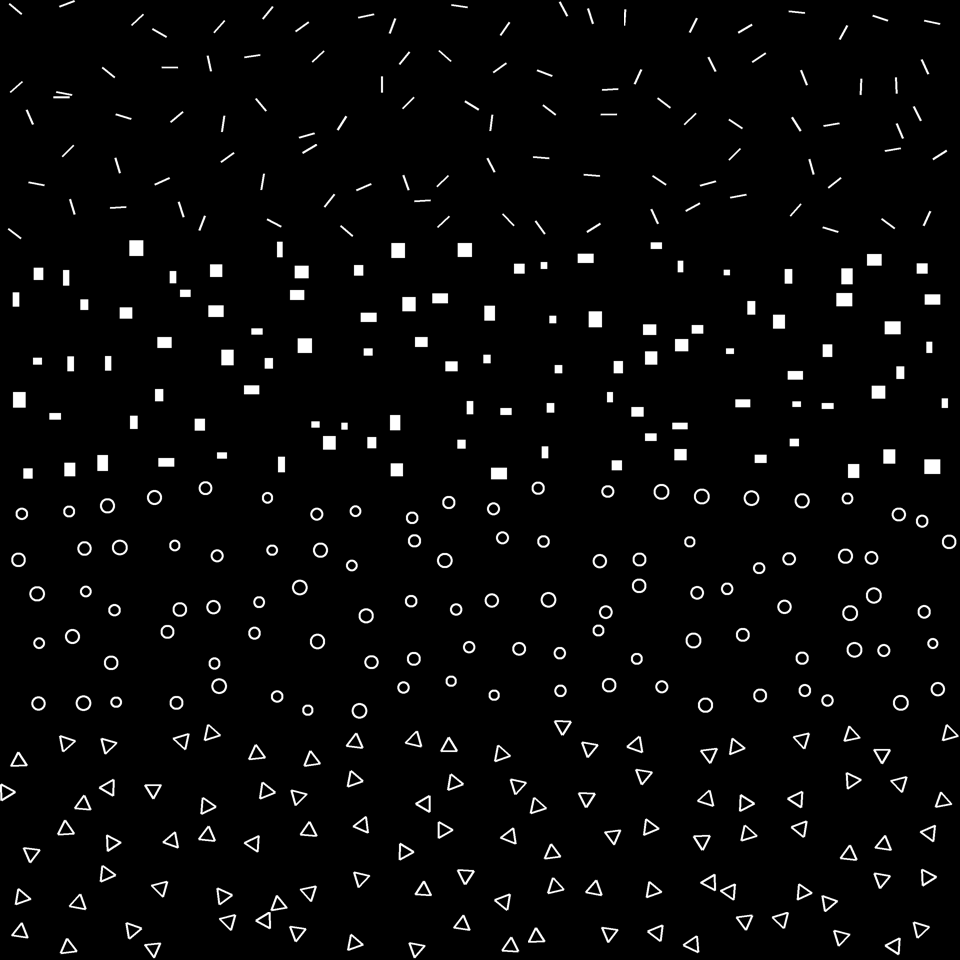

TensorShape([48, 48, 1])

In [23]:
data = project.display_dataset()
image_shape = data["x_all"][0].shape
image_shape

In [ ]:
u.display_many_images(data["x_test"][:100])

In [ ]:
model = project.train_classifier(data)

In [ ]:
rev_model = project.layer_stuff(model, data)

In [ ]:
model.summary()
line_model = project.reverse_model(model, [11, 0], "dense_neuron")
rect_model = project.reverse_model(model, [11, 1], "dense_neuron")
circle_model = project.reverse_model(model, [11, 2], "dense_neuron")
triangle_model = project.reverse_model(model, [11, 3], "dense_neuron")

img = tf.random.uniform(image_shape, 0, 1)
u.display_float32_image(img)
u.display_float32_image(tf.pad(img, [[10,3], [10, 3], [0,0]]))
powers = [2 ** i for i in range(20)]
options = ["translate"]
vizzes = zip(
    project.viz_by_opt(line_model, options),
    project.viz_by_opt(rect_model, options),
    project.viz_by_opt(circle_model, options),
    project.viz_by_opt(triangle_model, options),
)

for i, imgs in enumerate(vizzes):
    if i in powers:
        print("Step", i)
        for img in imgs:
            u.display_float32_image(img)

In [ ]:
model, encoder, decoder = project.train_autoencoder(data)